#### Importing libraries

In [95]:
# importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.cluster import KMeans
import pylab as pl

In [96]:
# setting up filepath
path = r'C:\Users\Richárd\Desktop\CareerFoundry\Data Immersion\Achievement 6\project\Data'
supply_chain = pd.read_pickle(os.path.join(path, 'clean_supply_chain_v2.pkl'))

In [97]:
supply_chain.columns

Index(['type', 'shipping_days_real', 'shipping_days_scheduled',
       'profit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'market', 'order_city',
       'order_country', 'order_date', 'order_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_region', 'order_state',
       'order_status', 'product_id_card', 'product_name', 'product_price',
       'product_status', 'shipping_date', 'shipping_mode'],
      dtype='object')

In [98]:
# Splitting up similar scale variables into subsets - decided to do this twice
supply_chain_ratios = supply_chain[['order_item_discount_rate', 'order_item_profit_ratio']] 
# item quantity is a bit of a different scale than the rest, but since it is rather important, I chose to leave it as it is,, I'm wondering if this is a reasonable call or not
# after running the algorithm I decided to dich that idea - it indeed made the model ignore basically everything else - with 2 variables only this is not very useful, but I'll leave it here neverthenless
supply_chain_dollars = supply_chain[['order_item_discount', 'profit_per_order', 'sales_per_customer', 'sales', 'product_price']] 

In [99]:
# Setting up potential number of clusters and k-means
num_clusters = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in range(1, 10)]

In [100]:
# setting up a score representing variance between the clusters with a certain number of clusters
score = [kmeans[i].fit(supply_chain_ratios).score(supply_chain_ratios) for i in range(len(kmeans))]
score

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

[-3840.388224307144,
 -1897.7059902945725,
 -1157.13557761446,
 -763.5108688004564,
 -622.8257614333077,
 -483.1138112484396,
 -419.7119491835522,
 -371.3029378649368,
 -333.5046857981362]

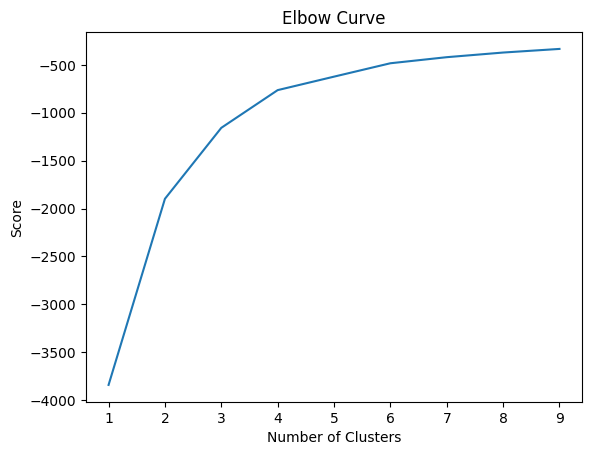

In [101]:
# plotting the elbow curve
pl.plot(num_clusters, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Number choice explaination
- It seems, that the curve flattens out after 3, so 3 was chosen.


In [102]:
# creating the k-means object, fitting in the ratios subset
kmeans = KMeans(n_clusters = 3) 
kmeans.fit(supply_chain_ratios)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [103]:
supply_chain_ratios['clusters'] = kmeans.fit_predict(supply_chain_ratios)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Richárd\AppData\Local\Temp\ipykernel_16252\327845007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_ratios['clusters'] = kmeans.fit_predict(supply_chain_ratios)


In [104]:
supply_chain_ratios['clusters'].value_counts()

2    102489
1     39017
0     39013
Name: clusters, dtype: int64

<AxesSubplot: xlabel='order_item_profit_ratio', ylabel='order_item_discount_rate'>

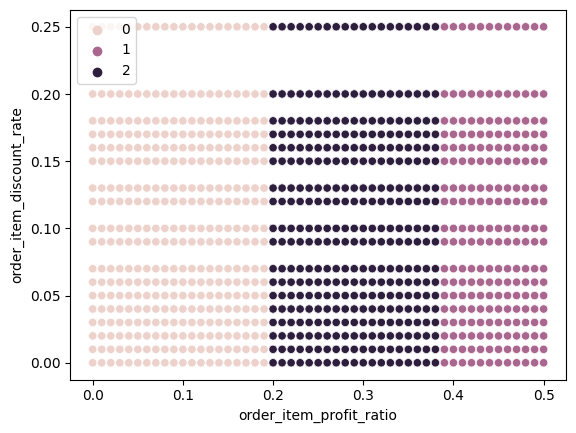

In [105]:
# visualizations
sns.scatterplot(data=supply_chain_ratios, x = 'order_item_profit_ratio', y = 'order_item_discount_rate', hue = kmeans.labels_)
# well, this is not very useful, so let us move on to the other subset

In [106]:
# Setting up potential number of clusters and k-means for the second subset
num_clusters2 = range(1, 10)
kmeans2 = [KMeans(n_clusters=i) for i in range(1, 10)]

In [107]:
# setting up a score representing variance between the clusters with a certain number of clusters
score2 = [kmeans2[i].fit(supply_chain_dollars).score(supply_chain_dollars) for i in range(len(kmeans2))]
score2

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

[-9731591169.974714,
 -4498032204.46084,
 -2731075677.2126684,
 -1756971296.793501,
 -1405883177.912283,
 -1067115972.6516123,
 -832561026.2097212,
 -611287574.3735077,
 -503201238.66486895]

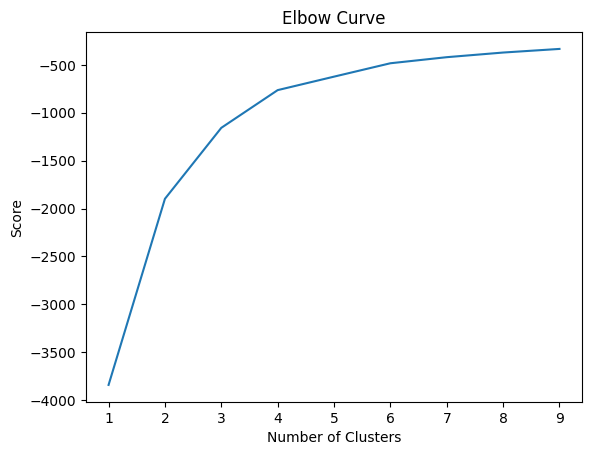

In [108]:
# plotting the elbow curve
pl.plot(num_clusters2, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Cluster number choice
- This time 4 seems to be the best call, after that the curve flattens quite a bit

In [109]:
# creating the second k-means object, fitting in the dollars subset
kmeans2 = KMeans(n_clusters = 4) 
kmeans2.fit(supply_chain_dollars)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [110]:
supply_chain_dollars['clusters'] = kmeans2.fit_predict(supply_chain_dollars)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Richárd\AppData\Local\Temp\ipykernel_16252\709106011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_dollars['clusters'] = kmeans2.fit_predict(supply_chain_dollars)


In [111]:
supply_chain_dollars['clusters'].value_counts()

2    82665
0    58939
1    38448
3      467
Name: clusters, dtype: int64

In [112]:
supply_chain_dollars.columns

Index(['order_item_discount', 'profit_per_order', 'sales_per_customer',
       'sales', 'product_price', 'clusters'],
      dtype='object')

<AxesSubplot: xlabel='order_item_discount', ylabel='profit_per_order'>

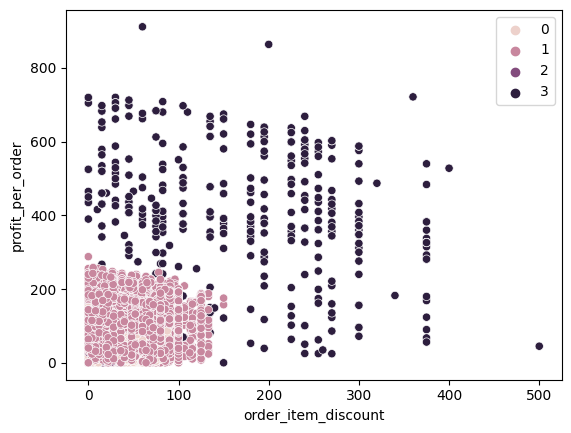

In [113]:
# visualizing some results
sns.scatterplot(data=supply_chain_dollars, x='order_item_discount', y='profit_per_order', hue=kmeans2.labels_)

<AxesSubplot: xlabel='product_price', ylabel='sales_per_customer'>

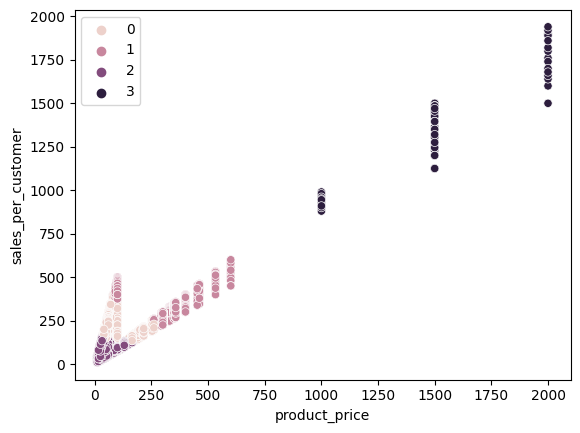

In [114]:
sns.scatterplot(data=supply_chain_dollars, x='product_price', y='sales_per_customer', hue=kmeans2.labels_)

<AxesSubplot: xlabel='sales', ylabel='profit_per_order'>

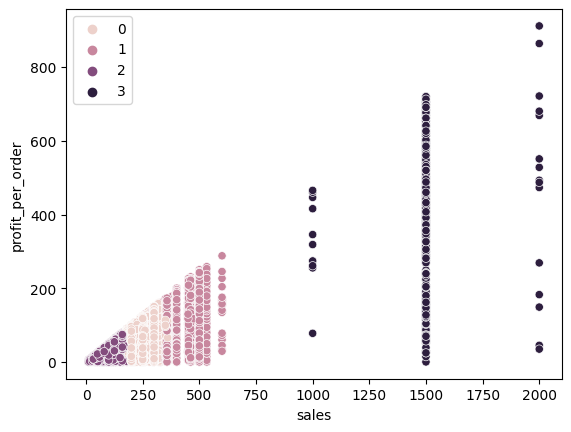

In [115]:
sns.scatterplot(data=supply_chain_dollars, x='sales', y='profit_per_order', hue=kmeans2.labels_)

#### Observations
- These are not very useful as they are, in the case of the ratio variables, the number of variables is too small, while the 'dollars' one, they seem to be mostly grouped by sales values only.
- One of the other reasons why this might be a poor fit for this dataset that many of the numeric variables are related to one-another in some way, and I think that makes the model inherently biased

In [116]:
# descriptive statistics of ratios
supply_chain_ratios.loc[supply_chain_ratios['clusters'] == 2, 'cluster'] = 'dark purple'
supply_chain_ratios.loc[supply_chain_ratios['clusters'] == 1, 'cluster'] = 'purple'
supply_chain_ratios.loc[supply_chain_ratios['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Richárd\AppData\Local\Temp\ipykernel_16252\2833182467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_ratios.loc[supply_chain_ratios['clusters'] == 2, 'cluster'] = 'dark purple'


In [117]:
supply_chain_ratios.columns

Index(['order_item_discount_rate', 'order_item_profit_ratio', 'clusters',
       'cluster'],
      dtype='object')

In [118]:
supply_chain_ratios.groupby('cluster').agg({'order_item_discount_rate': ['mean', 'median'],
                                            'order_item_profit_ratio': ['mean', 'median']})
# we can see that the model basically grouped the results based on their profit ratios

order_item_discount_rate        order_item_profit_ratio       
                                mean median                    mean median
cluster                                                                   
dark purple                 0.101724   0.09                0.300613   0.29
pink                        0.101452   0.10                0.095618   0.10
purple                      0.101739   0.09                0.465247   0.47

In [119]:
# descriptive statistics of dollars
supply_chain_dollars.loc[supply_chain_dollars['clusters'] == 3, 'cluster'] = 'dark purple'
supply_chain_dollars.loc[supply_chain_dollars['clusters'] == 2, 'cluster'] = 'purple'
supply_chain_dollars.loc[supply_chain_dollars['clusters'] == 1, 'cluster'] = 'pink'
supply_chain_dollars.loc[supply_chain_dollars['clusters'] == 1, 'cluster'] = 'light'

C:\Users\Richárd\AppData\Local\Temp\ipykernel_16252\985688454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_dollars.loc[supply_chain_dollars['clusters'] == 3, 'cluster'] = 'dark purple'


In [120]:
supply_chain_dollars.columns

Index(['order_item_discount', 'profit_per_order', 'sales_per_customer',
       'sales', 'product_price', 'clusters', 'cluster'],
      dtype='object')

In [121]:
supply_chain_dollars.groupby('cluster').agg({'order_item_discount': ['mean', 'median'],
                                            'profit_per_order': ['mean', 'median'],
                                            'sales_per_customer': ['mean', 'median'],
                                            'sales': ['mean', 'median'],
                                            'product_price': ['mean', 'median']})
# it does seem that the model mainly grouped by sales only, which is very dependant on price - again the problem stems from the numerical variables being 'related'

order_item_discount         profit_per_order          \
                           mean  median             mean  median   
cluster                                                            
dark purple          153.704497  140.00       393.554240  404.55   
light                 36.760817   35.00        97.988444   98.59   
purple                10.444401    7.95        26.697361   26.09   

            sales_per_customer                     sales               \
                          mean       median         mean       median   
cluster                                                                 
dark purple        1351.648286  1365.000000  1505.352783  1500.000000   
light               333.945595   335.980011   370.705877   399.980011   
purple               91.665874    99.000000   102.110127   119.970001   

            product_price               
                     mean       median  
cluster                                 
dark purple   1505.352783  1500.000000  
light          333.134912   357.100006  
purple          70.529423    50.000000

#### What these results could be useful for in future steps of an analytics pipeline?
Unfortunately, not much, since the numeric variables are all related - which makes modeling inherently biased.
It shows, that this dataset should be more suitable for time-series analysis or analysis based on the numerous categorical variables present